<h1>Selección de variables mediante Hocking</h1>

In [3]:
proc import out= work.data
datafile= "/folders/myfolders/Econometria/asphalt_binder.csv" 
dbms=csv replace; getnames=yes; datarow=2; 
run;




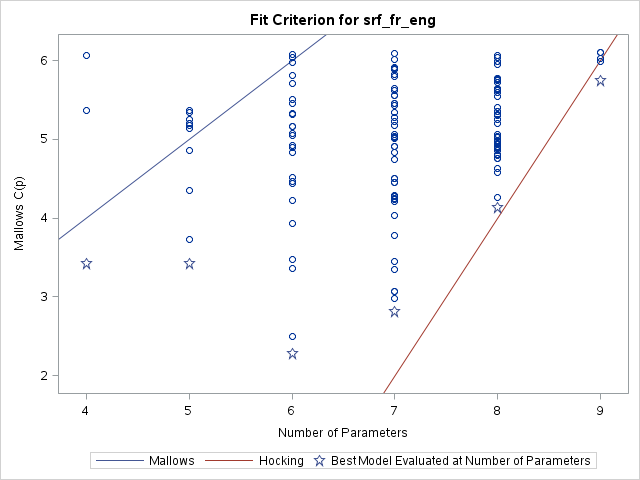
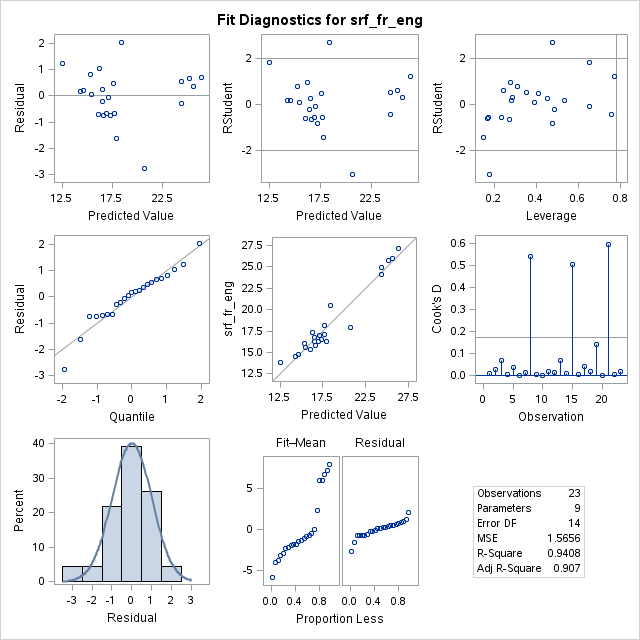
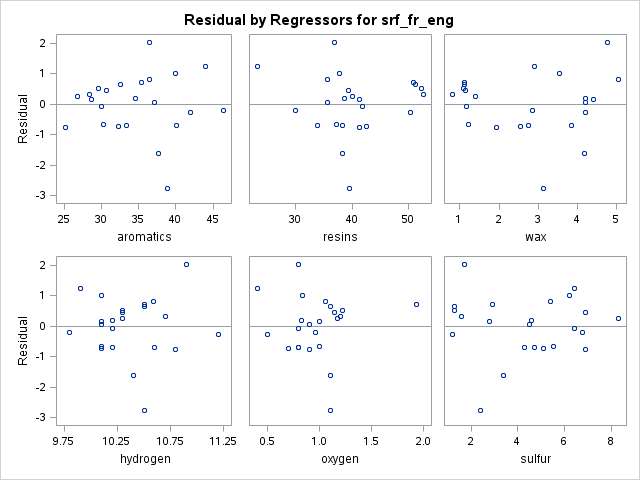
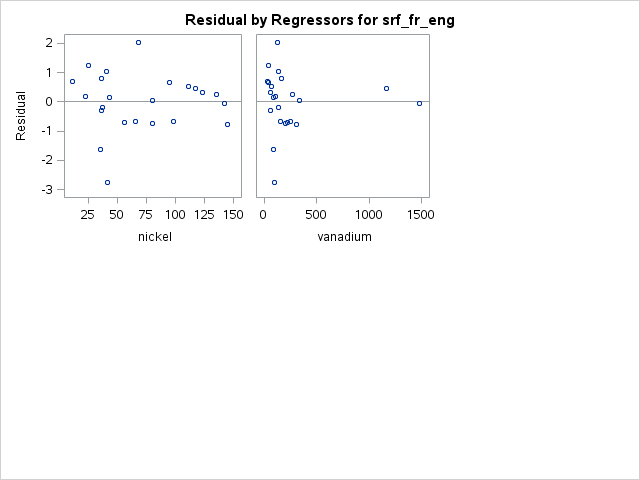
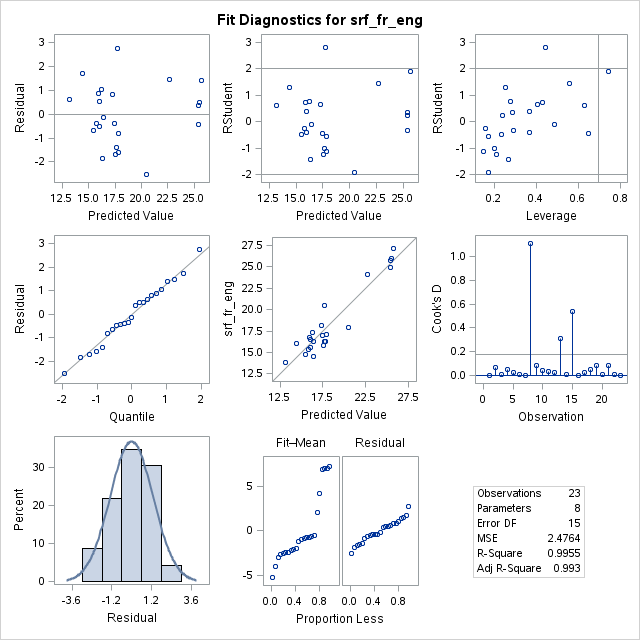
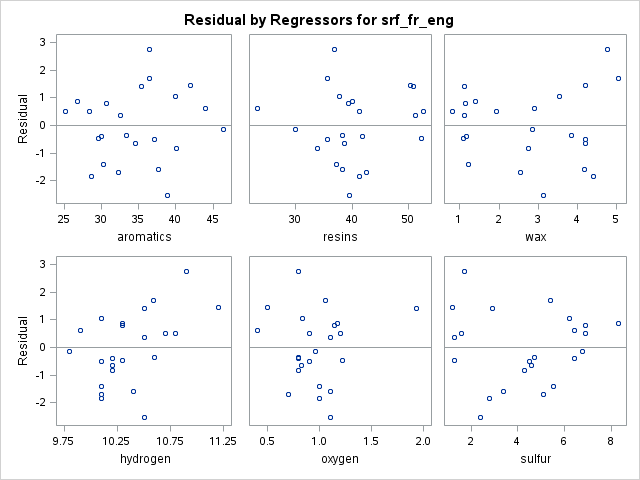
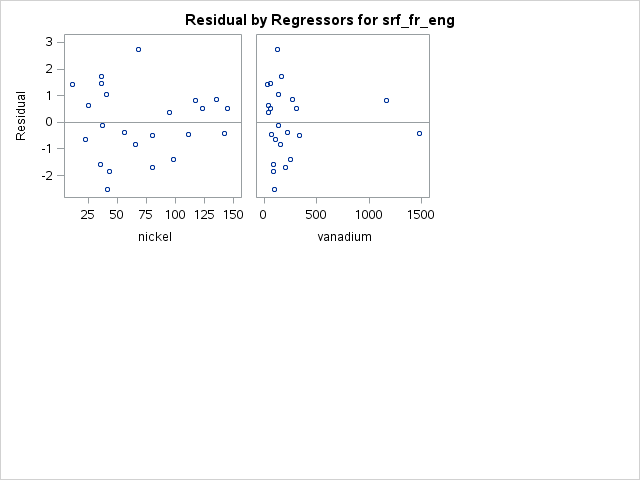

In [4]:
%let xlist = saturates aromatics resins asptenes wax carbon hydrogen oxygen nitrogen sulfur nickel vanadium;

 ods graphics / imagemap=on ;
proc reg data=work.data plots(only)=(cp);
model srf_fr_eng = &xlist / selection=cp rsquare adjrsq ;
title 'Mejor modelo (Hocking) utilizando todos las opciones de regresion con interceptor ';
run; 
quit; 
title;

PROC REG DATA =WORK.data ; 
	model srf_fr_eng = aromatics resins wax hydrogen oxygen sulfur nickel vanadium / VIF SPEC DW;

title 'Validación del modelo, colinealidad de regresores, significancia de los parámetros';
   output out=out residual=r;	
run;
quit;


proc univariate data=out normal; /* Anderson-Darling */
	var r;
	title 'Normalidad: Anderson-Darling ';
run;
quit;

PROC REG DATA =WORK.data ; 
	model srf_fr_eng = aromatics resins wax hydrogen oxygen sulfur nickel vanadium / noint VIF SPEC DW;

title 'Validación del modelo, colinealidad de regresores, significancia de los parámetros';
   output out=out residual=r;	
run;
quit;


proc univariate data=out normal; /* Anderson-Darling */
	var r;
	title 'Normalidad: Anderson-Darling ';
run;
quit;
